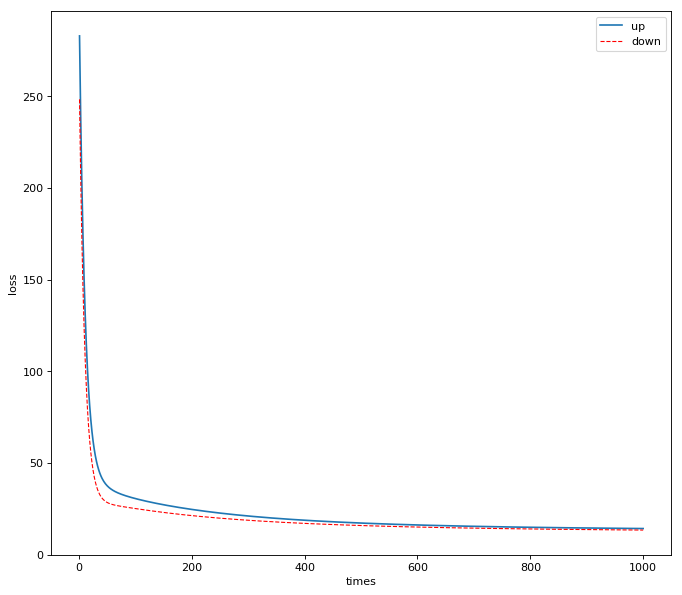

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
dir = "./jiqixuexi/"
def get_data():
    data = load_svmlight_file(dir + "housing_scale.txt")
    return data[0], data[1]

# get_loss
def get_loss(lda,w,x,y):
    return ((lda/2)*np.dot(w.T,w)+(0.5*np.dot((y-(np.dot(x,w)).T),(y-np.dot(x,w)))))*(1/x.shape[0])
    

X, y = get_data()
# huafengdhujuji
w = np.zeros((14,))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
a = np.ones((X_train.shape[0],1))
b = np.ones((X_test.shape[0],1))
X_train = np.column_stack((X_train.toarray(),a))
X_test = np.column_stack((X_test.toarray(),b))
loss =[]
loss_test= []
i=1000
while i>0:
        grad =0.05*w + ( 1/(X_train.shape[0]))*(np.dot(((X_train).T),(np.dot(X_train,w)-y_train)))
        w = w-0.01*grad
        loss.append(get_loss(0.05,w,X_train,y_train))
        loss_test.append(get_loss(0.05,w,X_test,y_test))
        i=i-1
x = []
for i in range(1000):
    x.append(i+1)
plt.figure(figsize=(10,9), dpi=80)
l1,= plt.plot(x, loss)
l2,=plt.plot(x, loss_test, color='red', linewidth=1.0, linestyle='--')
plt.xlabel('times')
plt.ylabel('loss')
plt.legend(handles=[l1, l2,], labels=['up', 'down'],  loc='best')
plt.show()            
            